Step 1. Look at the big picture and fram the problem
Define the objective in business terms. 
To create an linear regression model that predicts future profits and makes a risk analysis for 50 different startup companies in order for investors to 

How shall your solution be used? 
Solution can be optimized among giving investors an insight to which startup companies can bring profit
User Story: As an investor I want to see which company has the lowest chance of failing because I want to invest in them.

How should you frame this problem (supervised/unsupervised, online/offline, etc.)? Action: You may re-address chapter 1 for these concepts.
Since we are working with Linear Regression here, we are under the category of supervised learning.

How should performance be measured? Action: First of all select at measure that goes with the way you framed the problem – RMSE, Confusion matrix or something else. 
Performance should be measured through resulting correlations (calculated through using RMSE and residuals) which will also produce result for a risk analysis model

Is the performance measure aligned with the business objective? Action: Discuss whether your performance measure makes sense regarding your business objective.
Yes, as making valid predictions to a specific companies profit rates together with a risk analysis model will bring a major benefit to investors who want to invest in startup companies.

What are comparable problems? Can you reuse experience? Action: Reuse all the stuff and tools you know – especially, what you learned from chapter 2 
Familiarity with using pandas and matplotlib will help us in exploring and visualizing the data whereas the statistical calculations will allow us to understand what needs to be done to produce accurate results.

List the assumptions you (or others have made so far) Action: Figure out what assumptions you actually made Note: Some assumptions have already been made in the case description. Which?
Assumptions made:  Few companies have some data set to 0.0


Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parker
import seaborn as sns
from zlib import crc32
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file
dataset = pd.read_csv('Data/50_Startups.csv')

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
print(dataset.info())

print('States with count:')
print(dataset["State"].value_counts())

print('Data set type:')
print(type(dataset))

print('Data set description:')
print(dataset.describe())

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64
Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   1

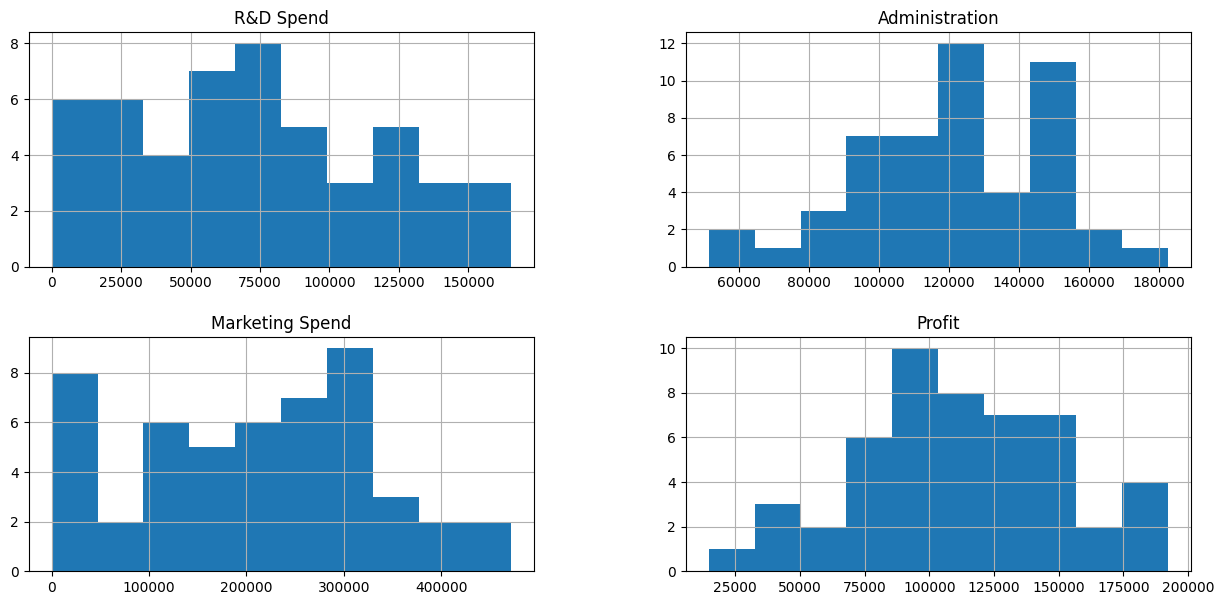

In [4]:
# Visualize the data
dataset.hist(figsize=(15,7))

plt.show()

Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [5]:
# Drop orginal state column and label 
X=dataset.drop(['Profit','State'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [6]:
# Drop orginal state column and label 
y=dataset.drop(['State'],axis=1)
y.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
from sklearn.preprocessing import OneHotEncoder
#define OHT and fit transform
ohe=OneHotEncoder(sparse=False)
transformed=ohe.fit_transform(dataset[['State']])
ohe.categories_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['California', 'Florida', 'New York'], dtype=object)]

In [8]:
dataset[ohe.categories_[0]]=transformed
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [9]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=123)
print(X_train.shape)
print(X_test.shape) 

print("test set using train_test_split from sklearn")
print("X test")
print(X_test)
print("y test")
print(y_test)

(40, 3)
(10, 3)
test set using train_test_split from sklearn
X test
    R&D Spend  Administration  Marketing Spend
10  101913.08       110594.11        229160.95
13   91992.39       135495.07        252664.93
30   61994.48       115641.28         91131.24
46    1315.46       115816.21        297114.46
18   91749.16       114175.79        294919.57
0   165349.20       136897.80        471784.10
40   28754.33       118546.05        172795.67
12   93863.75       127320.38        249839.44
29   65605.48       153032.06        107138.38
8   120542.52       148718.95        311613.29
y test
    R&D Spend  Administration  Marketing Spend     Profit
10  101913.08       110594.11        229160.95  146121.95
13   91992.39       135495.07        252664.93  134307.35
30   61994.48       115641.28         91131.24   99937.59
46    1315.46       115816.21        297114.46   49490.75
18   91749.16       114175.79        294919.57  124266.90
0   165349.20       136897.80        471784.10  192261.83
40

In [10]:
# Merging x and y values into test and training sets
train_set = X_train.merge(y_train)

train_set.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,78389.47,153773.43,299737.29,111313.02
1,0.00,135426.92,0.00,42559.73
2,100671.96,91790.61,249744.55,144259.40
3,27892.92,84710.77,164470.71,77798.83
4,131876.90,99814.71,362861.36,156991.12


STEP 3.
Explore the Data
Experementing with Attribute Combinations

In [11]:
# Show the unique values
dataset.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
California          2
Florida             2
New York            2
dtype: int64

In [12]:
# Show the dataypes
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
California         float64
Florida            float64
New York           float64
dtype: object

In [13]:
# Correlations for training set
corr_train = train_set.corr()

# Display Correlations of profit only
corr_train['Profit'].sort_values(ascending=False)


Profit             1.000000
R&D Spend          0.968886
Marketing Spend    0.778201
Administration     0.176308
Name: Profit, dtype: float64

In [14]:
# Get the correlations of the data
corr = dataset.corr()

# Display Correlations of profit only
corr['Profit'].sort_values(ascending=False)

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_72709/2343394996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Florida            0.116244
New York           0.031368
California        -0.145837
Name: Profit, dtype: float64

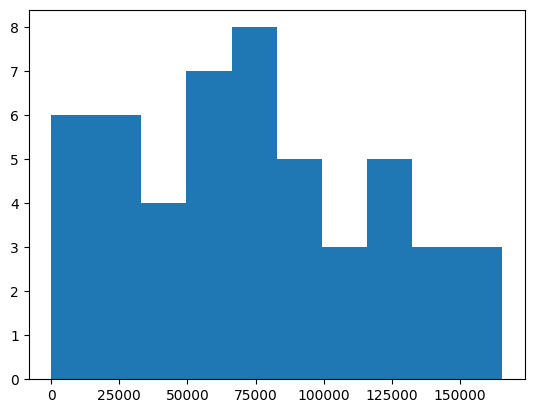

In [15]:
# Histogram of R&D spend
plt.hist(data=dataset,x='R&D Spend')
plt.show()

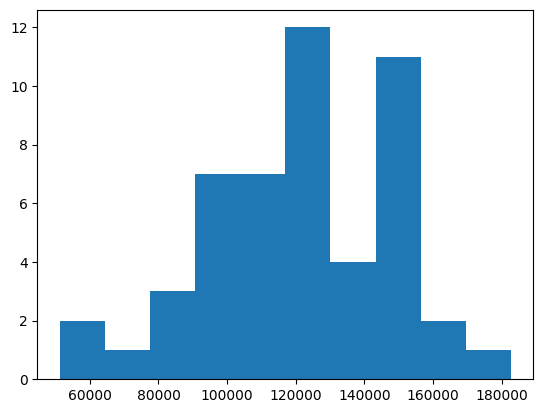

In [16]:
# Histogram of Administrations
plt.hist(data=dataset,x='Administration')
plt.show()

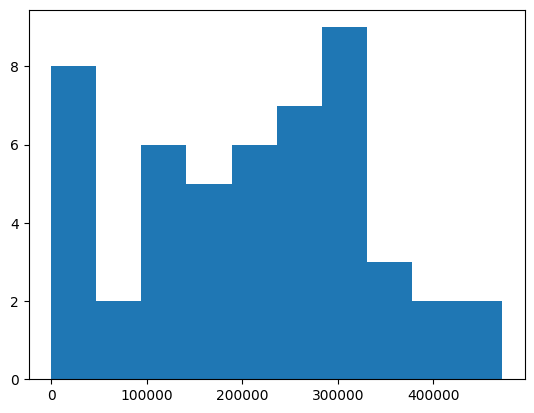

In [17]:
# Histogram of Market Spendings
plt.hist(data=dataset,x='Marketing Spend')
plt.show()

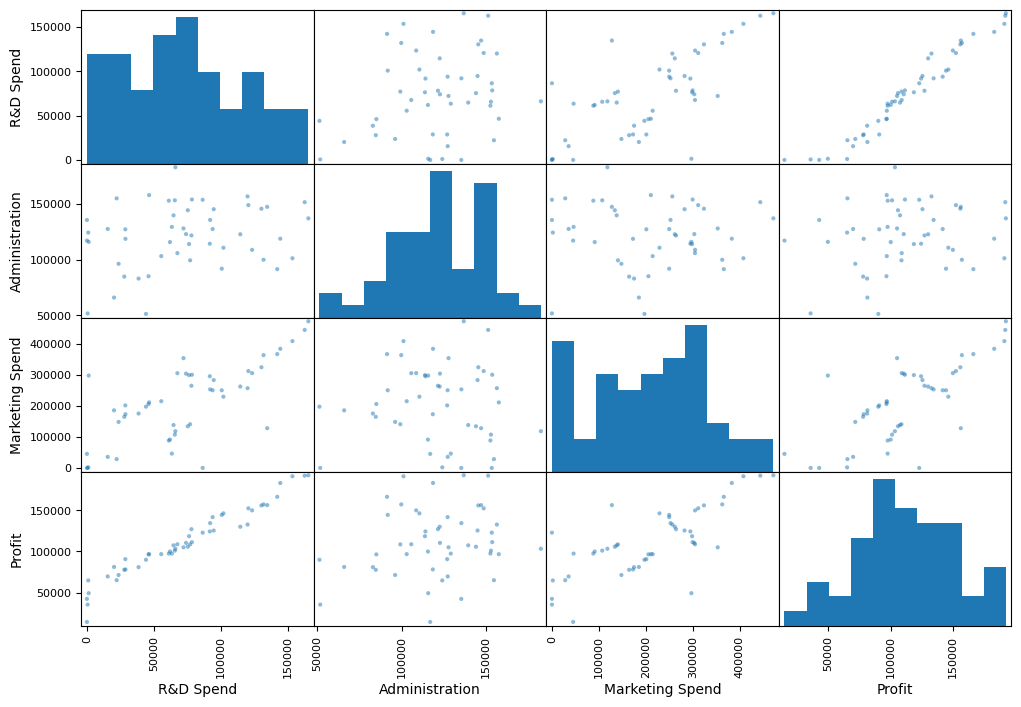

In [18]:
# Make a sactter matrix plot together with the correlation values
attributes = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()


In [19]:
# Experiment with the attributes
dataset['R&D Spend + Administration'] = dataset['R&D Spend'] + dataset['Administration']
dataset['R&D Spend + Marketing Spend'] = dataset['R&D Spend'] + dataset['Marketing Spend']
dataset['Administration + Marketing Spend'] = dataset['Administration'] + dataset['Marketing Spend']
dataset['R&D Spend + Administration + Marketing Spend'] = dataset['R&D Spend'] + dataset['Administration'] + dataset['Marketing Spend']
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0,302247.00,637133.30,608681.90,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0,313975.29,606496.23,595276.12,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0,254587.06,561376.05,509080.09,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0,263044.26,527572.03,501871.47,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0,233499.11,508275.76,457560.19,599667.53


In [20]:
# Get the correlations of the data
corr = dataset.corr()

# Display Correlations of profit only
corr['Profit'].sort_values(ascending=False)

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_72709/2343394996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


Profit                                          1.000000
R&D Spend                                       0.972900
R&D Spend + Administration + Marketing Spend    0.872598
R&D Spend + Marketing Spend                     0.857488
R&D Spend + Administration                      0.848182
Administration + Marketing Spend                0.779178
Marketing Spend                                 0.747766
Administration                                  0.200717
Florida                                         0.116244
New York                                        0.031368
California                                     -0.145837
Name: Profit, dtype: float64

In [21]:
# Append attributes excluding Florida, new york, and california to the training set
X_train['R&D Spend + Administration'] = X_train['R&D Spend'] + X_train['Administration']
X_train['R&D Spend + Marketing Spend'] = X_train['R&D Spend'] + X_train['Marketing Spend']
X_train['Administration + Marketing Spend'] = X_train['Administration'] + X_train['Marketing Spend']
X_train['R&D Spend + Administration + Marketing Spend'] = X_train['R&D Spend'] + X_train['Administration'] + X_train['Marketing Spend']
X_train.head()

,R&D Spend,Administration,Marketing Spend,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
21,78389.47,153773.43,299737.29,232162.90,378126.76,453510.72,531900.19
47,0.00,135426.92,0.00,135426.92,0.00,135426.92,135426.92
11,100671.96,91790.61,249744.55,192462.57,350416.51,341535.16,442207.12
41,27892.92,84710.77,164470.71,112603.69,192363.63,249181.48,277074.40
5,131876.90,99814.71,362861.36,231691.61,494738.26,462676.07,594552.97


Confirms that R&D Spend + Administration + Marketing Spend is the best combination

List of those with strong correlation: R&D Spend, Marketing Spend

The correlations for profit in R&D Spend: Approx. 0.97
The correlations for profit in Marketing Spend: Approx: 0.75

Indicating a high positive correlation which can be used to predict accurate profit increase in both markets

STEP 4.
Prepare the Data

In [22]:
# Show ne training set with dropped states
X_train.head()

,R&D Spend,Administration,Marketing Spend,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
21,78389.47,153773.43,299737.29,232162.90,378126.76,453510.72,531900.19
47,0.00,135426.92,0.00,135426.92,0.00,135426.92,135426.92
11,100671.96,91790.61,249744.55,192462.57,350416.51,341535.16,442207.12
41,27892.92,84710.77,164470.71,112603.69,192363.63,249181.48,277074.40
5,131876.90,99814.71,362861.36,231691.61,494738.26,462676.07,594552.97


In [23]:
# Standardize or normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X_train)
x

array([[ 0.14946664,  1.13490863,  0.79504021,  0.68190379,  0.6536273 ,
         1.05706422,  0.84924864],
       [-1.5699115 ,  0.52248256, -1.63886107, -0.93436063, -1.70641427,
        -1.49193678, -1.57792214],
       [ 0.63820609, -0.93414402,  0.38909341,  0.01859082,  0.48067646,
         0.15973523,  0.30015639],
       [-0.95811406, -1.17047663, -0.30333998, -1.31569108, -0.50579529,
        -0.58035157, -0.71077006],
       [ 1.32264868, -0.666291  ,  1.30761492,  0.67402948,  1.38144669,
         1.1305118 ,  1.23280286],
       [ 1.99647224,  1.05493294,  1.96564606,  2.04882493,  2.07897324,
         2.1931175 ,  2.23263721],
       [ 1.38271568,  0.91544281, -0.6017858 ,  1.51147972, -0.06909274,
        -0.37412753,  0.10011728],
       [ 0.01168143,  0.27004258,  1.2290321 ,  0.14406085,  0.9480009 ,
         1.27774025,  0.97937439],
       [-1.5699115 , -0.09316846, -1.27205062, -1.24250821, -1.42447099,
        -1.27773334, -1.41428405],
       [ 0.1199556 , -0.6840

Step 5.
Select and train a model

In [24]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Model makes predictions
y_pred = model.predict(X_train)
y_pred

array([[ 7.83894700e+04,  1.53773430e+05,  2.99737290e+05,
         1.17671320e+05],
       [ 3.75885212e-11,  1.35426920e+05, -1.30483744e-10,
         4.65299533e+04],
       [ 1.00671960e+05,  9.17906100e+04,  2.49744550e+05,
         1.34325547e+05],
       [ 2.78929200e+04,  8.47107700e+04,  1.64470710e+05,
         7.49419460e+04],
       [ 1.31876900e+05,  9.98147100e+04,  3.62861360e+05,
         1.62411988e+05],
       [ 1.62597700e+05,  1.51377590e+05,  4.43898530e+05,
         1.88188316e+05],
       [ 1.34615460e+05,  1.47198870e+05,  1.27716820e+05,
         1.55328038e+05],
       [ 7.21076000e+04,  1.27864550e+05,  3.53183810e+05,
         1.15165713e+05],
       [ 2.68176759e-11,  1.16983800e+05,  4.51730600e+04,
         4.84699615e+04],
       [ 7.70440100e+04,  9.92813400e+04,  1.40574810e+05,
         1.11976333e+05],
       [ 6.11363800e+04,  1.52701920e+05,  8.82182300e+04,
         9.67951336e+04],
       [ 1.14523610e+05,  1.22616840e+05,  2.61776230e+05,
      

In [26]:
y_test

,R&D Spend,Administration,Marketing Spend,Profit
10,101913.08,110594.11,229160.95,146121.95
13,91992.39,135495.07,252664.93,134307.35
30,61994.48,115641.28,91131.24,99937.59
46,1315.46,115816.21,297114.46,49490.75
18,91749.16,114175.79,294919.57,124266.90
0,165349.20,136897.80,471784.10,192261.83
40,28754.33,118546.05,172795.67,78239.91
12,93863.75,127320.38,249839.44,141585.52
29,65605.48,153032.06,107138.38,101004.64
8,120542.52,148718.95,311613.29,152211.77


In [27]:
# compute the mean and the root mean square of the performance measure on a manually selected subset (5-10 data) of the training data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# The mean squared error
print("Mean squared error: %.2f"

      % mean_squared_error(y_train, y_pred))

# The mean absolute error
print("Mean absolute error: %.2f"

      % mean_absolute_error(y_train, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'

      % r2_score(y_train, y_pred))

# Apply Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# Model makes predictions
y_pred = model.predict(X_train)
y_pred

Mean squared error: 21800444.56
Mean absolute error: 1704.55
Coefficient of determination: 0.99


array([[ 7.83894700e+04,  1.53773430e+05,  2.99737290e+05,
         1.17671320e+05],
       [ 3.19261040e-07,  1.35426920e+05,  4.28035216e-08,
         4.65299533e+04],
       [ 1.00671960e+05,  9.17906100e+04,  2.49744550e+05,
         1.34325547e+05],
       [ 2.78929200e+04,  8.47107700e+04,  1.64470710e+05,
         7.49419460e+04],
       [ 1.31876900e+05,  9.98147100e+04,  3.62861360e+05,
         1.62411988e+05],
       [ 1.62597700e+05,  1.51377590e+05,  4.43898530e+05,
         1.88188316e+05],
       [ 1.34615460e+05,  1.47198870e+05,  1.27716820e+05,
         1.55328038e+05],
       [ 7.21076000e+04,  1.27864550e+05,  3.53183810e+05,
         1.15165713e+05],
       [ 3.45151088e-07,  1.16983800e+05,  4.51730600e+04,
         4.84699615e+04],
       [ 7.70440100e+04,  9.92813400e+04,  1.40574810e+05,
         1.11976333e+05],
       [ 6.11363800e+04,  1.52701920e+05,  8.82182300e+04,
         9.67951336e+04],
       [ 1.14523610e+05,  1.22616840e+05,  2.61776230e+05,
      

Output with Coefficient of deteremination shows a high accurate predicition of: 0.99

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_72709/2092241539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_train)


<Axes: ylabel='Density'>

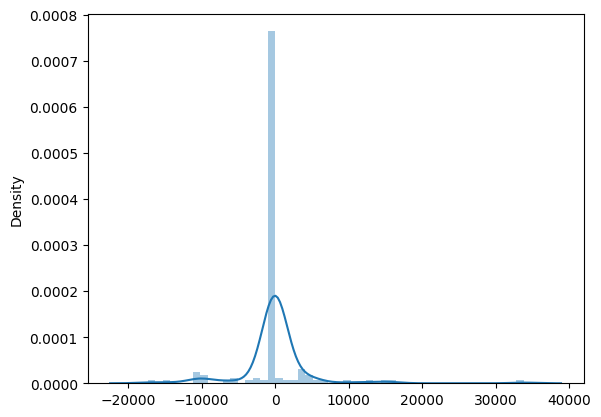

In [28]:
# Display the accuracy of our model compared to the training set
sns.distplot(y_pred - y_train)

Step 6. Fine tune and test the model

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'r2', cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Fine tune and test the model
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)


0.9649863925180506
{'alpha': 1000000}


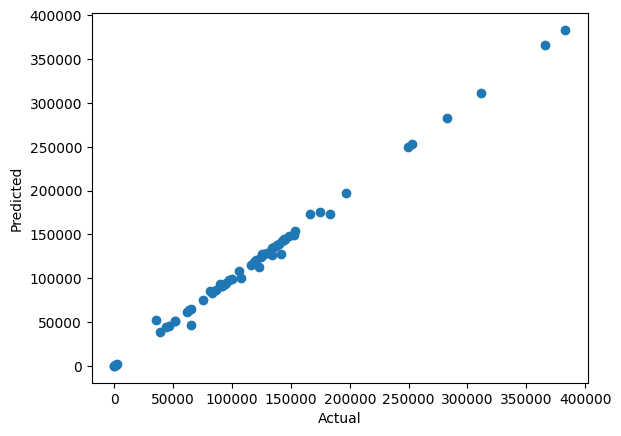

In [43]:
# Visualizing data
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()